# 개인프로젝트 

사용 데이터 : 서울일자리센터 인재정보 직종별, 지역별 목록.csv

주제 : 서울일자리센터 인재정보를 활용하여 데이터 전처리과 기초통계량 분석 및 시각화 진행 - 서울시를 중심으로
## #01. 데이터 불러오기 
### 필요한 패키지 설치


In [61]:
import pandas as pd 


### 데이터 불러오기 

In [2]:
df = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv",encoding="euc-kr")


## #02. 데이터 확인

In [3]:
df.head()

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H117202307112815,남,62,J00110,대학_대학교,서울,강동구,서울,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,30:57.0,31:00.0
1,H117202307112803,남,66,J00104,중학교,경기,하남시,서울,강동구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,25:47.0,25:52.0
2,H117202307112802,남,63,J00106,고등학교,경기,고양시,서울,NaN,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,20:50.0,20:56.0
3,H117202307112790,남,68,J00110,대학_대학교,서울,강동구,서울,송파구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,12:26.0,12:33.0
4,H117202307112771,남,68,J00106,고등학교,서울,강동구,서울,송파구,26301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,07:38.0,07:42.0


In [4]:
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드             object
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망근무지역명(시도)_2      object
희망근무지역명(시군구)_2     object
희망직종공통코드            int64
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력년_월수         object
구직인증상태공통구분         object
구직인증상태공통구분명        object
검색키워드1             object
검색키워드2             object
검색키워드3             object
검색키워드4             object
검색키워드5             object
등록일시               object
수정일시               object
dtype: object

## #03. 데이터 전처리

### 1. 필요없는 변수 제거 

In [5]:

## 분석에 필요없는 희망직종경력년_월수, 구직인증상태공통구분 , 구직인증상태공통구분명, 검색키워드, 등록,수정일시
## + 희망직종공통코드  제거 + 학력 공통코드 제거 

df= df.iloc[:,:-9]
df = df.drop(columns=["희망직종공통코드","학력공통코드"])


In [7]:
## 희망근무지역은 1순위만 따지기 위해 2순위 칼럼 제거 
df = df.drop(columns=["희망근무지역명(시도)_2","희망근무지역명(시군구)_2"])
df

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입


### 2. 데이터 정제 
### (1) 결측치 제거

In [15]:
## 결측치 확인 
df.isnull().sum()



구직신청번호              0
성별                  0
나이                  0
학력공통코드명             0
희망근무지역(시도)_1       10
희망근무지역명(시군구)_1     79
희망직종공통코드명           0
희망직종경력년수          260
희망직종경력년_월수          0
dtype: int64

In [16]:
## 희망직종경력년수의 결측치 확인 
df[df['희망직종경력년수'].isnull()]
## 희망직종 경력이 결측치인 경우에는 희망직종 경력년_월수가 신입인 경우임.
## 따라서 희망직종경력년수의 결측치는 0으로 대치

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
...,...,...,...,...,...,...,...,...,...
572,H322202307051420,남,44,고등학교,서울,서초구,경비원(건물 관리원),NaN,신입
580,H001202306282863,남,64,전문대학,서울,NaN,기타 전기?전자 기기 설치?수리원,NaN,신입
598,H320202306142175,남,60,대학_대학교,서울,동작구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
612,H325202305300855,여,50,고등학교,서울,강동구,사무 보조원(일반사업체),NaN,신입


In [18]:
df['희망직종경력년수']=df['희망직종경력년수'].fillna(value = 0)
df.isnull().sum()

구직신청번호             0
성별                 0
나이                 0
학력공통코드명            0
희망근무지역(시도)_1      10
희망근무지역명(시군구)_1    79
희망직종공통코드명          0
희망직종경력년수           0
희망직종경력년_월수         0
dtype: int64

In [20]:
## 희망근무지역 결측치 제거 
### 희망 근무지역의 결측치 행은 임의로 값을 추가하기엔 어렵다고 판단해서 희망근무지역의 결측치는 제거하기로 판단

df = df.dropna()
df.isnull().sum()

구직신청번호            0
성별                0
나이                0
학력공통코드명           0
희망근무지역(시도)_1      0
희망근무지역명(시군구)_1    0
희망직종공통코드명         0
희망직종경력년수          0
희망직종경력년_월수        0
dtype: int64

### (2) 파생변수 추가 

In [24]:
## 희망직종경력개월수 파생변수 만들어서 평균 경력분석 ㄱㄱ 
## 희망직종경력개월수에 대해 파악하기 위해 희망직종경력년수에 12를 곱합
df['희망직종경력개월수'] = df.loc[:,'희망직종경력년수'] * 12 
df

C:\Users\hamin\AppData\Local\Temp\ipykernel_22740\1050144636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['희망직종경력개월수'] = df.loc[:,'희망직종경력년수'] * 12


,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
...,...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월,204.0
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월,60.0
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월,12.0
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입,0.0


### (3) 변수의 값 정리

#### 희망직종경력년_월수


In [32]:
## 희망직종경력년수와 개월수 칼럼이 있기 떄문에 희망직종경력년_월수 칼럼을 신입과 경력으로 구분하고 칼럼이름 바꿈

df.loc[df['희망직종경력년_월수']!="신입","희망직종경력년_월수"] = "경력"
df = df.rename(columns={"희망직종경력년_월수": "희망직종경력유무"})
df.value_counts("희망직종경력유무")



희망직종경력유무
경력    314
신입    234
Name: count, dtype: int64

#### 희망근무지역

In [43]:
## 서울시를 중심으로 분석할 예정이기 떄무에 희망근무지역 = 서울로 데이터 정제 
df['희망근무지역(시도)_1'].unique()

df = df.loc[df['희망근무지역(시도)_1']=="서울",:]
df['희망근무지역(시도)_1'].unique()



array(['서울'], dtype=object)

###  최종 데이터 확인 .

In [44]:
df.head(5)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


In [45]:
df.info()
## 나이 희망직종경력년수 희망직종경력개월수 칼럼이 연속형변수 
## 나머지는 명목형 변수 
## 그룹바이 교차표 피벗테이블 -> melt 써보기 


<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 626
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구직신청번호          535 non-null    object 
 1   성별              535 non-null    object 
 2   나이              535 non-null    int64  
 3   학력공통코드명         535 non-null    object 
 4   희망근무지역(시도)_1    535 non-null    object 
 5   희망근무지역명(시군구)_1  535 non-null    object 
 6   희망직종공통코드명       535 non-null    object 
 7   희망직종경력년수        535 non-null    float64
 8   희망직종경력유무        535 non-null    object 
 9   희망직종경력개월수       535 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 46.0+ KB


## #04. 데이터 재구조화 

### 1. 데이터 집계

In [46]:
## 데이터 확인 
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


### (1) 피벗테이블을 이용한 평균나이 확인
        - 구직희망자들의 나이의 평균을 희망근무지역과 성별 따라 집계

In [49]:
pivot_df = pd.pivot_table(df,index="희망근무지역명(시군구)_1",columns="성별",values="나이")
pivot_df

성별,남,여
희망근무지역명(시군구)_1,,
강남구,64.875000,51.000000
강동구,63.916667,60.647059
강북구,62.333333,62.000000
강서구,63.083333,57.333333
관악구,56.727273,60.166667
광진구,57.750000,63.000000
구로구,64.470588,57.736842
금천구,61.571429,57.142857
노원구,67.166667,60.125000


### (2) 교차표를 이용한 데이터 비율 확인
    - 구직희망자들의 성별에 따른 경력유무의 비율을 집계

In [51]:
crosstab_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'],normalize=True,margins=True)

crosstab_df

경력유무,경력,신입,All
성별,,,
남,0.218692,0.224299,0.442991
여,0.360748,0.196262,0.557009
All,0.579439,0.420561,1.000000


### (3) GroupBy를 활용한 집계
    - 학력에 따른 구직자들의 나이에 대한 집계
    

In [60]:
group_df = df.filter(['학력공통코드명','나이']).groupby("학력공통코드명").agg(['min','max','median','mean'])
group_df


나이                      
        min max median       mean
학력공통코드명                          
고등학교     22  80   62.0  61.068670
관계없음     55  80   65.0  66.583333
대학_대학교   20  77   57.0  53.336842
무학력      59  68   64.0  63.750000
박사과정     66  66   66.0  66.000000
석사과정     56  66   64.0  63.000000
전문대학     25  72   52.0  51.485714
중학교      51  76   65.0  64.962617
초등학교     31  79   67.0  67.232558

## #05. 데이터 시각화

In [ ]:
나이랑 경력년수 사이 상관관계 그래프 아니면 그냥그래프 ㄱㄱ 


#### 필요한 패키지 설치


In [63]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

#### 그래프 전역설정

In [64]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

In [66]:
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


### 1. Matplotlib 사용한 시각화



In [92]:
## 성별에 따른 경력유무 빈도수 데이터 추출
count_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'])

count_df
## 학력에 따른 빈도수 추출
school_df = pd.DataFrame(df.value_counts("학력공통코드명"))
school_df



,count
학력공통코드명,
고등학교,233
중학교,107
대학_대학교,95
초등학교,43
전문대학,35
관계없음,12
석사과정,5
무학력,4
박사과정,1


AttributeError: 'list' object has no attribute 'get_figure'

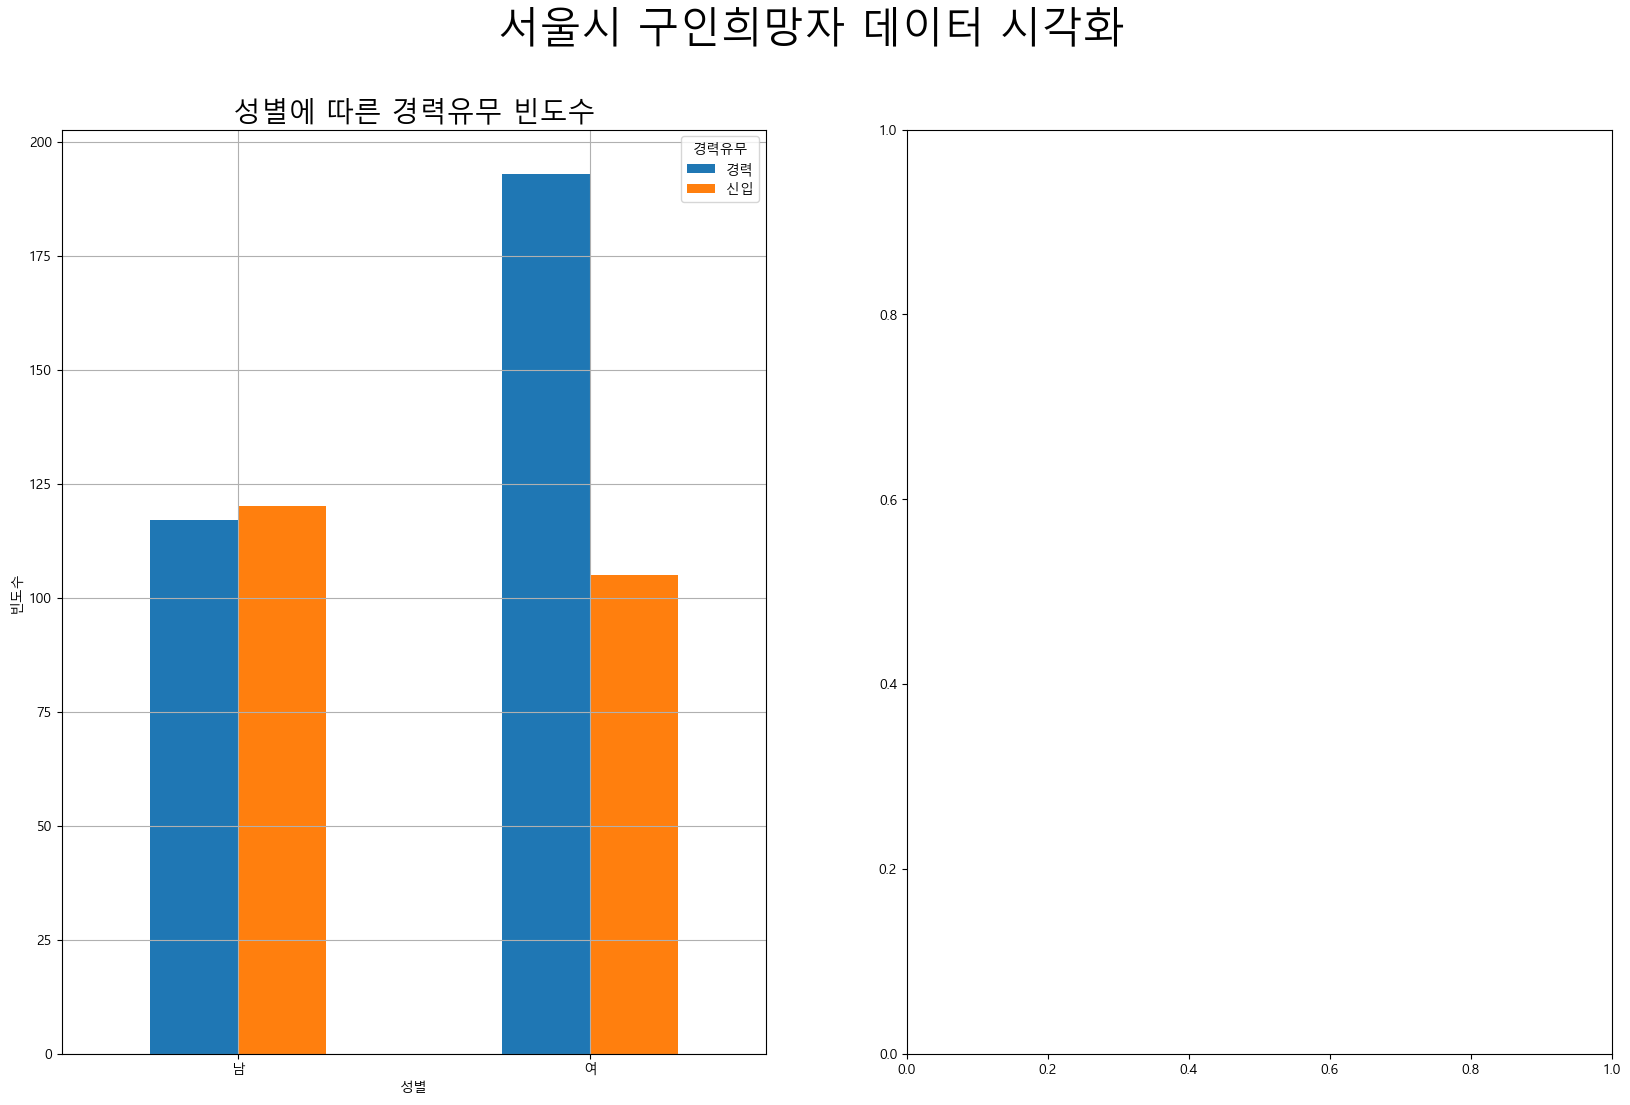

In [94]:
fig,ax = plt.subplots(1,2,figsize=(20,12))

# df.value_counts("희망직종공통코드명") 빈도수 ㄱㄱ 
## 데이터프레임을 기반으로 각 영역에 그래프 종류별 표시

## 전체 제목 

fig.suptitle("서울시 구인희망자 데이터 시각화",fontsize=30)

## 각 그래프간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 성별에따른 경력유무의 빈도수에 대한 그래프
#--------------------------------------------------------------
count_df.plot.bar(ax=ax[0],rot=0)
ax[0].grid()
ax[0].set_title('성별에 따른 경력유무 빈도수',fontsize=20)
ax[0].set(xlabel= "성별",ylabel="빈도수")

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 학력에 따른 파이차트
#--------------------------------------------------------------

school_df['count'].plot.pie(ax=[1],labels=school_df.index)